### Importing Pandas, Numpy , Matplotlib, Seaborn and Warnings library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import CSV Data as Pandas Dataframe

In [2]:
df=pd.read_csv("data/raw.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math score,reading_score,writing_score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


##### Shape of Dataset

In [4]:
df.shape

(1000, 8)

#### Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Checking Missing values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Check duplicates

In [7]:
df.duplicated().sum()

0

#### checking no. of unique values of each columns

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math score                     79
reading_score                  71
writing_score                  74
dtype: int64

#### checking statistics of data

In [9]:
df.describe()

,math score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math score,reading_score,writing_score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [11]:
print("Category Gender: ",end=" ")
print(df['gender'].unique())
print("Category Grace/ethnicity: ",end=" ")
print(df['race_ethnicity'].unique())
print("Category parental level of education: ",end=" ")
print(df['parental_level_of_education'].unique())
print("Category lunch: ",end=" ")
print(df['lunch'].unique())
print("Category test preparation course: ",end=" ")
print(df['test_preparation_course'].unique())

Category Gender:  ['female' 'male']
Category Grace/ethnicity:  ['group D' 'group B' 'group C' 'group E' 'group A']
Category parental level of education:  ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
Category lunch:  ['standard' 'free/reduced']
Category test preparation course:  ['completed' 'none']


In [12]:
# define numeric and category columns
numeric_features=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']

print("Total we have {} numerical features : {}".format(len(numeric_features),numeric_features))
print("Total we have {} categorical features : {}".format(len(categorical_features),categorical_features))

Total we have 3 numerical features : ['math score', 'reading_score', 'writing_score']
Total we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### creating new columns total score and avg score

In [13]:
df['total score']=df['math score']+df['writing_score']+df['reading_score']
df['Average score']=df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math score,reading_score,writing_score,total score,Average score
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667


In [14]:
reading_full=df[df['reading_score']==100]['Average score'].count()
writing_full=df[df['writing_score']==100]['Average score'].count()
math_full=df[df['math score']==100]['Average score'].count()
print(f"No.of students with full mrks in maths: {math_full}")
print(f"No.of students with full mrks in reading: {reading_full}")
print(f"No.of students with full mrks in writing: {writing_full}")

No.of students with full mrks in maths: 9
No.of students with full mrks in reading: 10
No.of students with full mrks in writing: 13


#### Exploring data with visualization

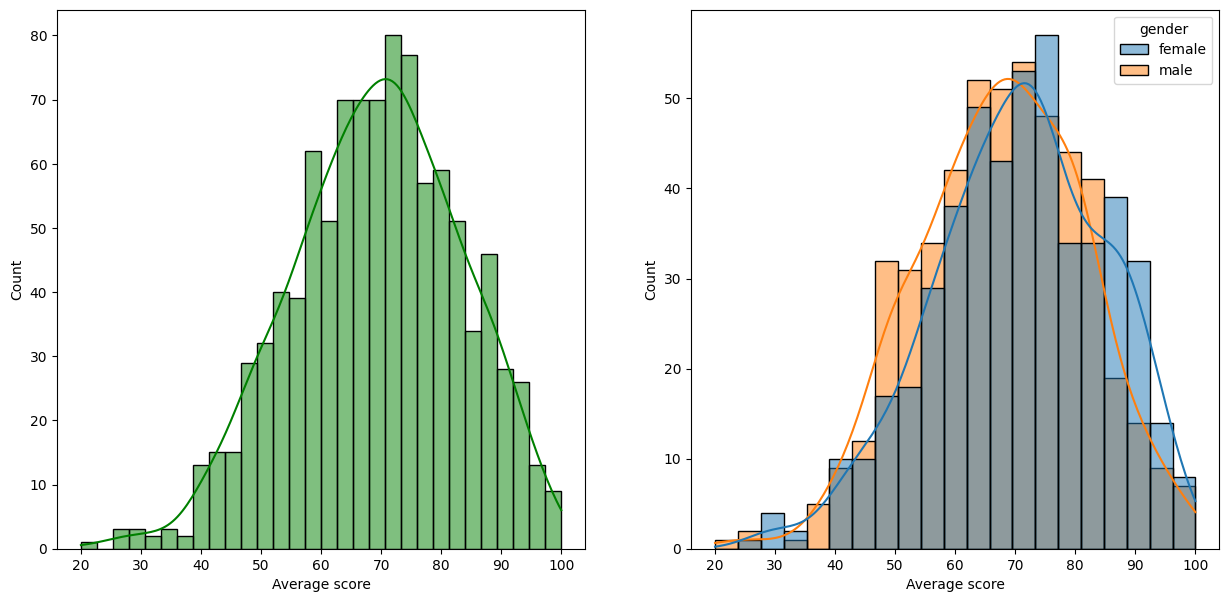

In [15]:
# visualize avg score distribution to make solution conclusion
#-- histogram
#-- KDE Kernel distribution function

fig, axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average score',kde=True,hue='gender')
plt.show()

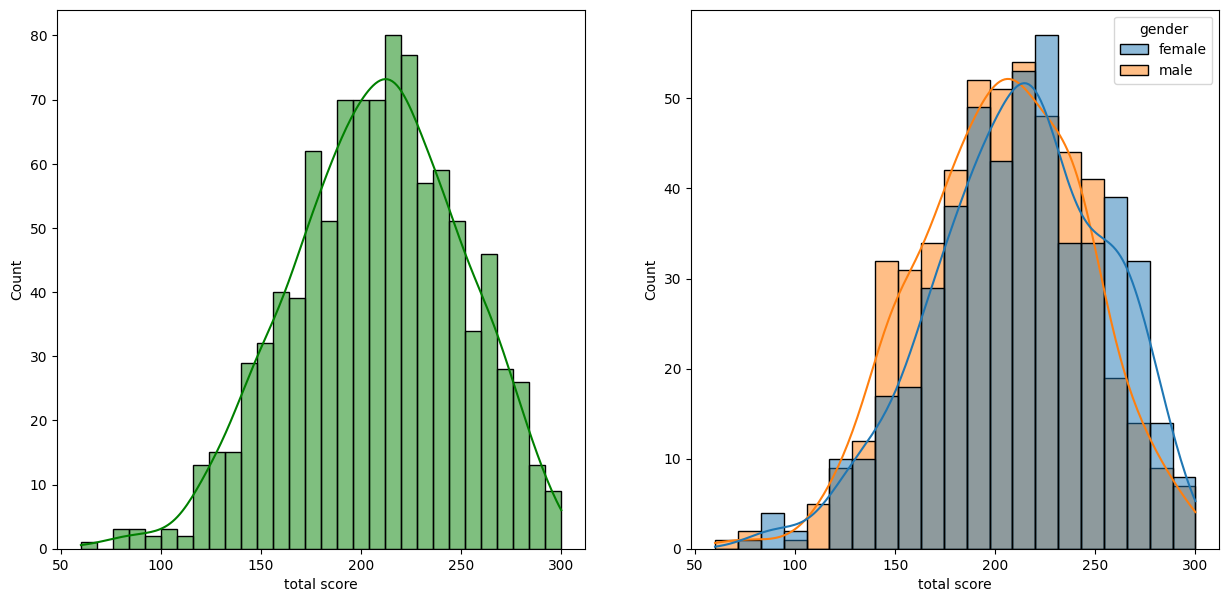

In [16]:
fig, axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

##### Insights
##### -- Female students tend to perform than male

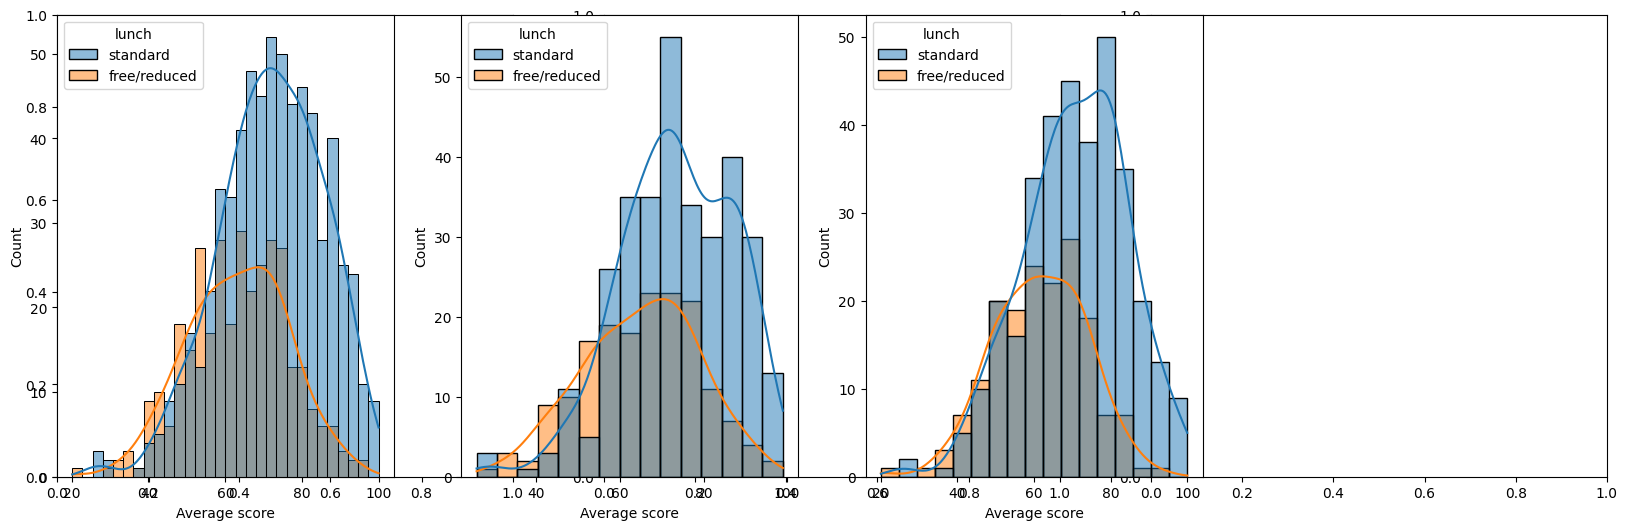

In [17]:
fig, axs=plt.subplots(1,3,figsize=(20,6))
plt.subplot(141)
sns.histplot(data=df,x='Average score',bins=30,kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=="female"],x='Average score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"],x='Average score',kde=True,hue='lunch')
plt.show()

In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math score,reading_score,writing_score,total score,Average score
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667


<Axes: ylabel='Count'>

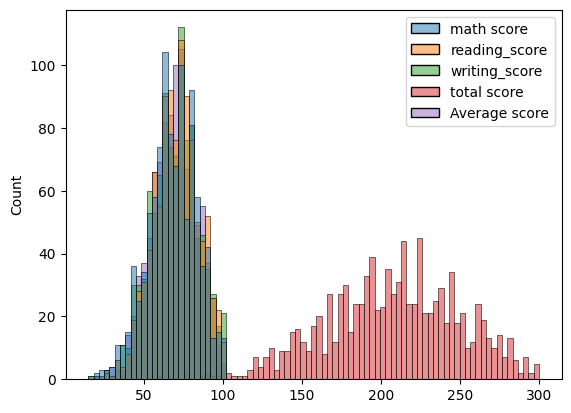

In [19]:
sns.histplot(df)

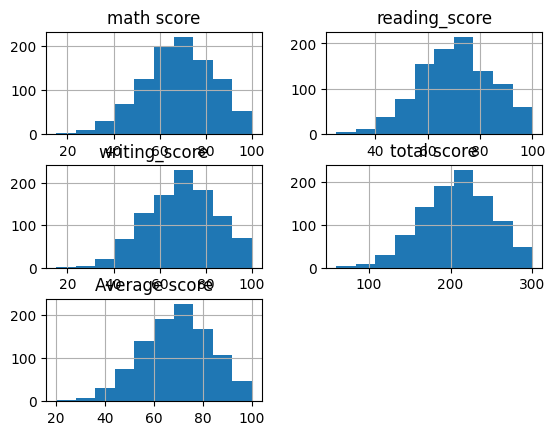

In [20]:
df.hist()
plt.show()